***Data Exploration.***

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#converting data set into a data frame
df = pd.read_csv("/content/mcdonalds.csv")

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.shape

(1453, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
#unique values in each column
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(df[column_name].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
[61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
['Female' 'Male']


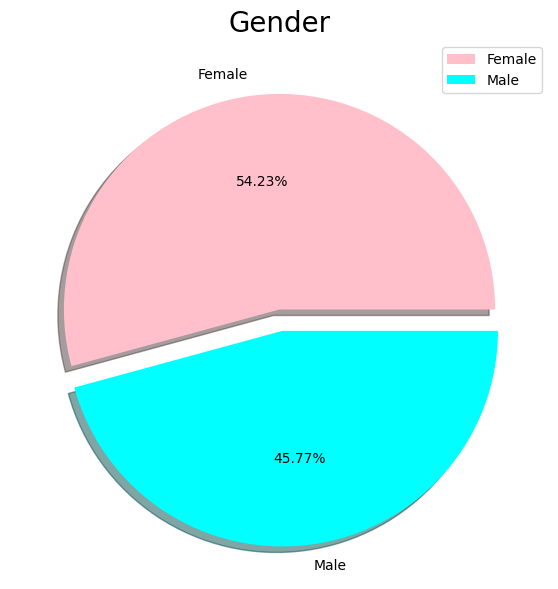

In [ ]:
#EXPLORING DATA

#Customer segmentation - based on socio-demographs (Age & Gender)

#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#we infer that there are more female customers than male.

<ipython-input-16-4eed38e1642e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.countplot(x=df['Age'],palette = 'hsv')


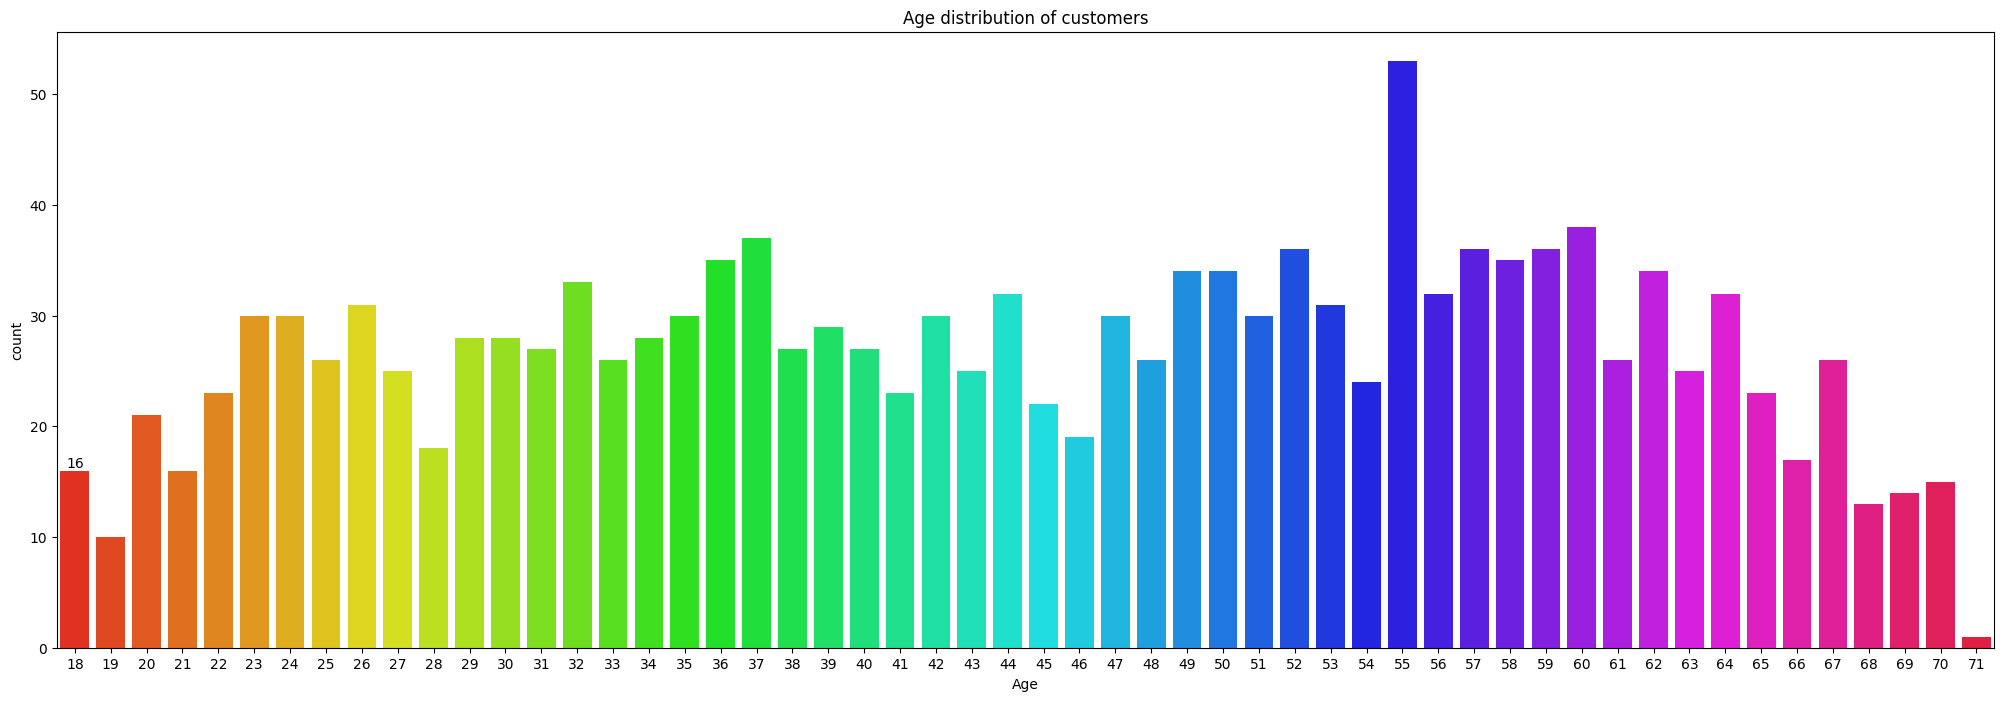

In [ ]:
#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

# Mcdonald's recieve more customers of age between 50-60 and 35-40.

<ipython-input-17-188d832402b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Like", y="Age",data=df,


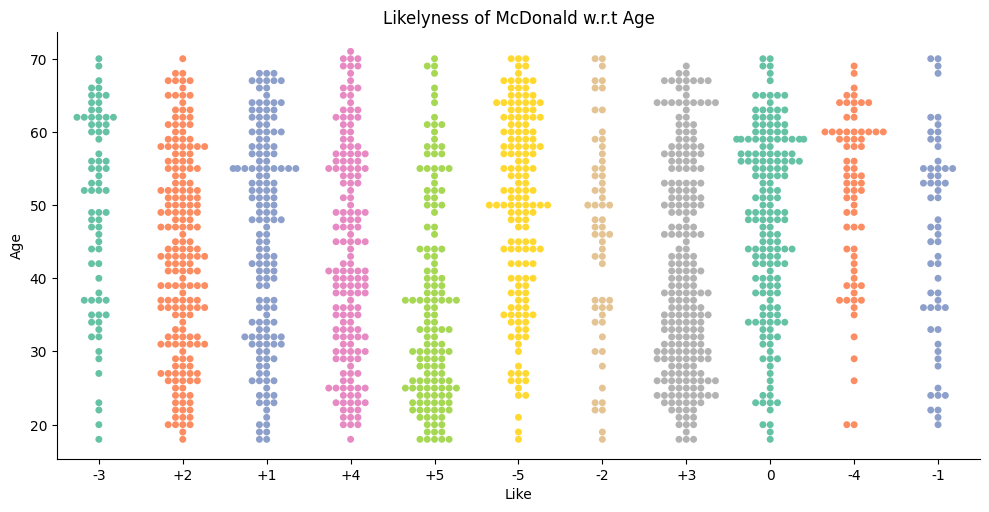

In [ ]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like
sns.catplot(x="Like", y="Age",data=df,
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [ ]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


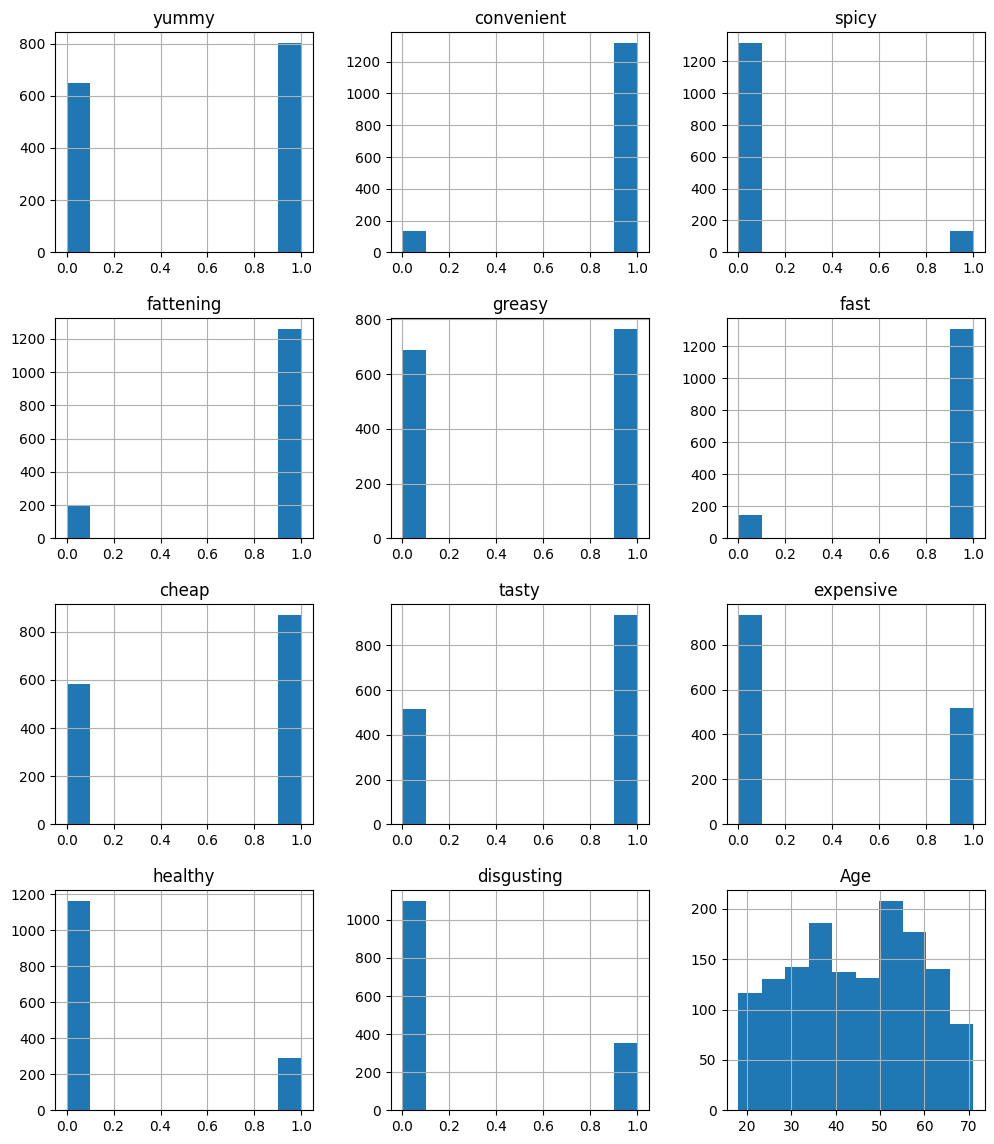

In [ ]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

***Data Preprocessing***

In [ ]:
df['Like']= df['Like'].replace({'-5': -5,'-4': -4,'-3': -3,'-2': -2,'-1': -1,'0': 0,'+1': 1,'+2': 2,'+3': 3,'+4': 4,'+5':5})

<ipython-input-20-a2d637f287d8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Like']= df['Like'].replace({'-5': -5,'-4': -4,'-3': -3,'-2': -2,'-1': -1,'0': 0,'+1': 1,'+2': 2,'+3': 3,'+4': 4,'+5':5})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(13), object(2)
memory usage: 170.4+ KB


In [ ]:
#converting visting frequency to values between 0 and 1, never being 0 while more than once a week being 1
df['VisitFrequency']= df['VisitFrequency'].replace({
    'Never': 0,
    'Once a year': 0.1,
    'Every three months': 0.3,
    'Once a month': 0.5,
    'Once a week': 0.8,
    'More than once a week': 1
})
df

<ipython-input-22-86dba993eaca>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VisitFrequency']= df['VisitFrequency'].replace({


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0.3,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0.3,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0.3,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0.8,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,0.5,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,0.1,Male
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,0.8,Female
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0.5,Female
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0.3,Male


In [ ]:
df['Gender']= df['Gender'].replace({'Female': 1,'Male': 0})
df

<ipython-input-23-a254956329be>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']= df['Gender'].replace({'Female': 1,'Male': 0})


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0.3,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0.3,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0.3,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0.8,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,0.1,0
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,0.8,1
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0.5,1
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0.3,0


In [ ]:
#normalizing columns
df2 = df.copy()
df2['Like'] = df2['Like'] /df2['Like'].abs().max()
df2['Age'] = df2['Age'] /df2['Age'].abs().max()
df2

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-0.6,0.859155,0.3,1
1,1,1,0,1,1,1,1,1,1,0,0,0.4,0.718310,0.3,1
2,0,1,1,1,1,1,0,1,1,1,0,0.2,0.873239,0.3,1
3,1,1,0,1,1,1,1,1,0,0,1,0.8,0.971831,0.8,1
4,0,1,0,1,1,1,1,0,0,1,0,0.4,0.690141,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-1.0,0.661972,0.1,0
1449,1,1,0,1,0,0,1,1,0,1,0,0.4,0.507042,0.8,1
1450,1,1,0,1,0,1,0,1,1,0,0,0.6,0.732394,0.5,1
1451,1,1,0,0,0,1,1,1,0,1,0,0.8,0.577465,0.3,0


In [ ]:
# saving the dataframe
df.to_csv('processed_data.csv')

In [ ]:
#Loading the dataset
df = pd.read_csv("/content/processed_data.csv")
df.shape
df.head()
df.dtypes
# 11 variable(cols) has yes or no values.

# checking for null data --> No null data
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1453 non-null   int64  
 1   yummy           1453 non-null   int64  
 2   convenient      1453 non-null   int64  
 3   spicy           1453 non-null   int64  
 4   fattening       1453 non-null   int64  
 5   greasy          1453 non-null   int64  
 6   fast            1453 non-null   int64  
 7   cheap           1453 non-null   int64  
 8   tasty           1453 non-null   int64  
 9   expensive       1453 non-null   int64  
 10  healthy         1453 non-null   int64  
 11  disgusting      1453 non-null   int64  
 12  Like            1453 non-null   int64  
 13  Age             1453 non-null   int64  
 14  VisitFrequency  1453 non-null   float64
 15  Gender          1453 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 181.8 KB


,0
Unnamed: 0,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0


In [ ]:
#Considering only first 11 attributes
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [ ]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

#Principal component analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.425367,0.219079,-0.663255,-0.401300,-0.201705,0.389767,-0.211982,-0.163235,-0.181007,-0.515706,0.567074
1,0.218638,-0.388190,0.730827,-0.094724,-0.044669,0.086596,-0.095877,0.034756,-0.111476,-0.493313,0.500440
2,-0.375415,-0.730435,0.122040,0.692262,-0.839643,0.687406,0.583112,-0.364379,0.322288,-0.061759,-0.242741
3,0.172926,0.352752,0.843795,0.206998,0.681415,0.036133,-0.054284,0.231477,0.028003,0.250678,0.051034
4,-0.187057,0.807610,-0.028537,0.548332,-0.854074,0.097305,-0.457043,-0.171758,0.074409,-0.031897,-0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.550242,-0.275031,0.013737,0.200604,0.145063,-0.306575,-0.075308,-0.345552,0.136589,0.432798,0.456076
1449,0.957339,-0.014308,-0.303843,0.444350,0.133690,-0.381804,-0.326432,-0.878047,0.304441,0.247443,0.193671
1450,0.185894,-1.062662,-0.220857,-0.467643,0.187757,0.192703,-0.091597,0.036576,-0.038255,-0.056518,0.012800
1451,1.182064,0.038570,-0.561561,0.701126,-0.047645,-0.193687,-0.027335,0.339374,-0.022267,0.002573,0.105316


In [ ]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [ ]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,0.476933,-0.363790,0.304444,0.055162,0.307535,-0.170738,-0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,-0.142425,-0.277608,0.347830,-0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,0.197619,-0.070620,0.355087,0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,-0.354139,0.073405,0.406515,-0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,0.253960,-0.361399,-0.209347,0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,-0.097363,-0.107930,0.594632,-0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,0.118958,0.128973,0.103241,-0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,-0.002547,0.210899,0.076914,0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,0.067816,0.003125,0.261342,-0.068385,-0.029539,-0.066996,-0.454399,0.490069


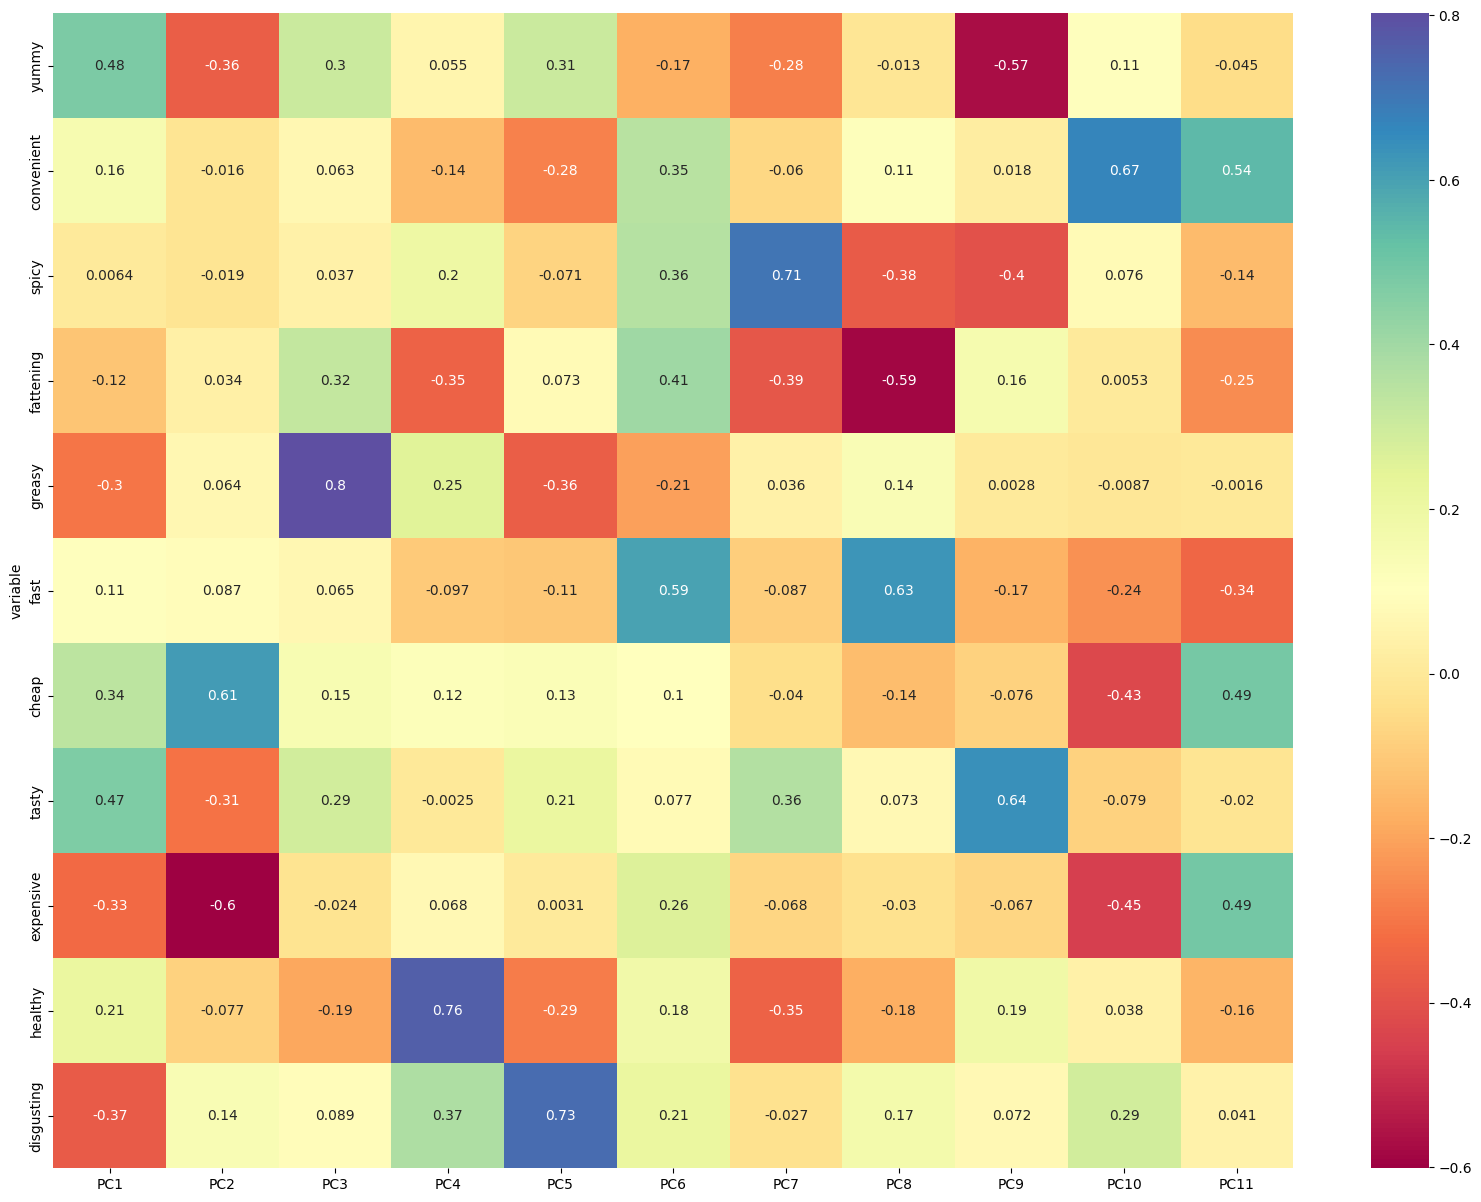

In [ ]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=74d2d89f536ce7b53f9411e1776b148bde096afe8422deb5c66ac335f70b35b8
  Stored in directory: /root/.cache/pip/wheels/83/cd/9c/8605a43f2310bfb74df791d943a9b3aef65377ed484de98bdc
Successfully built bioinfokit


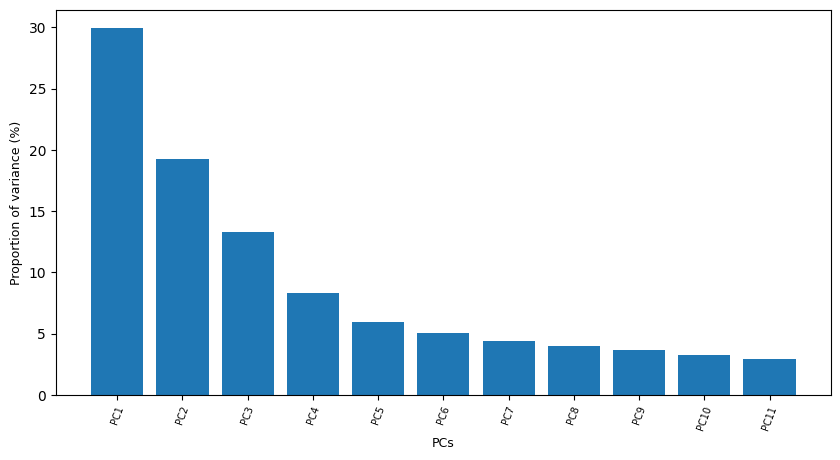

In [ ]:
#Scree plot (Elbow test)- PCA
!pip install bioinfokit
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

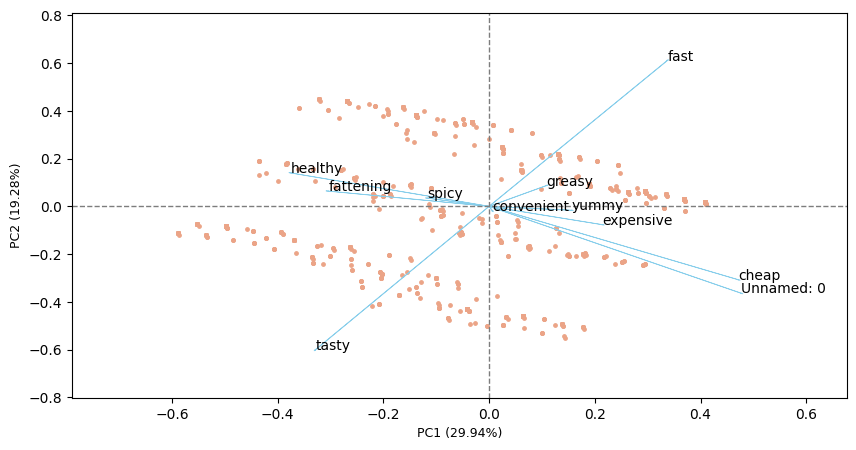

In [ ]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

**Segmentation**

In [ ]:
#K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[0 3 1 ... 1 3 1]
1748.968752115803
9
[[ 2.70270270e-02  8.47972973e-01  6.08108108e-02  9.05405405e-01
   6.11486486e-01  9.29054054e-01  8.41216216e-01 -1.44328993e-15
   5.40540541e-02  8.10810811e-02  4.45945946e-01]
 [ 5.11627907e-01  8.43551797e-01  9.30232558e-02  9.06976744e-01
   6.19450317e-01  8.01268499e-01  2.11416490e-02  5.60253700e-01
   9.83086681e-01  1.33192389e-01  3.46723044e-01]
 [ 1.44328993e-15  9.61832061e-01  1.37404580e-01  8.70229008e-01
   5.19083969e-01  9.38931298e-01  8.39694656e-01  1.00000000e+00
   5.34351145e-02  1.45038168e-01  1.75572519e-01]
 [ 1.00000000e+00  9.81916817e-01  1.01265823e-01  8.11934901e-01
   4.03254973e-01  9.60216998e-01  9.05967450e-01  9.76491863e-01
   5.78661844e-02  3.30922242e-01  6.14828210e-02]]


In [ ]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 296, 3: 553, 1: 473, 2: 131})

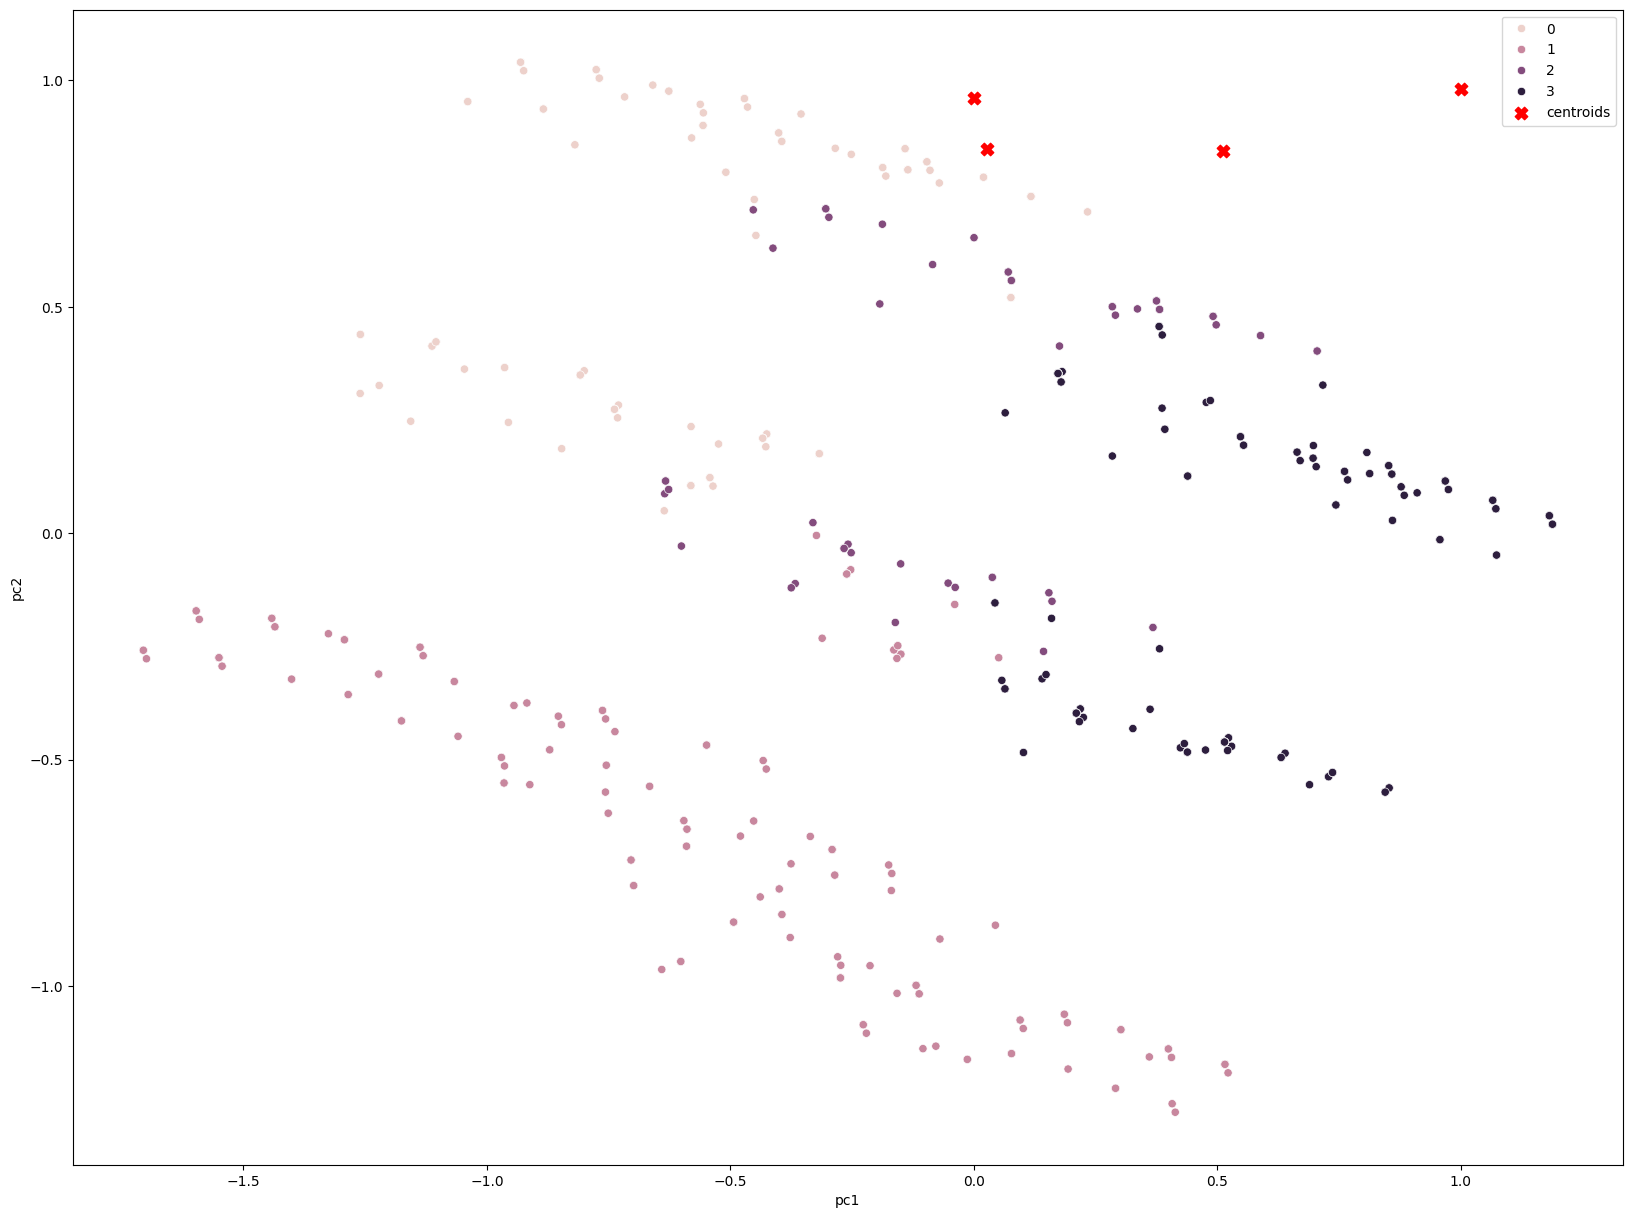

In [ ]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

***Describing Segments***

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[[-5,-4,-3,-2,-1,0,1,2,3,4,5]]
crosstab

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
cluster_num,,,,,,,,,,,
0,71,37,36,27,22,44,19,27,12,1,0
1,73,26,30,22,16,63,47,56,66,40,34
2,6,5,7,5,11,29,34,20,10,4,0
3,2,3,0,5,9,33,52,84,141,115,109


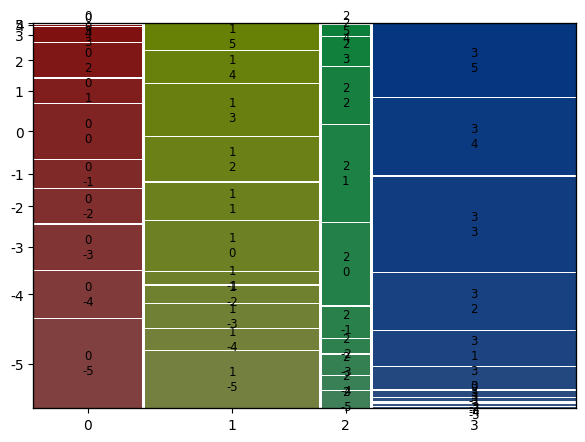

In [ ]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [ ]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,0,1
cluster_num,,
0,128,168
1,259,214
2,56,75
3,222,331


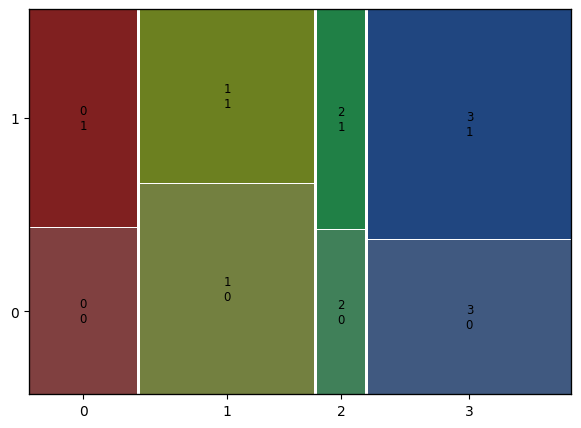

In [ ]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

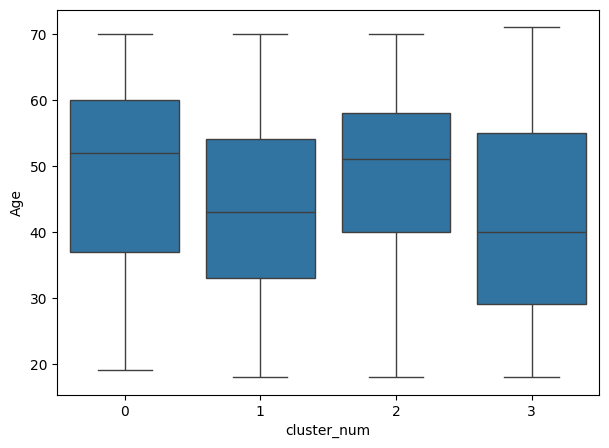

In [ ]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

In [ ]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,1.483108
1,1,2.291755
2,2,2.022901
3,3,3.028933


In [ ]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.060811
1,1,5.143763
2,2,5.213740
3,3,7.905967


In [ ]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.567568
1,1,0.452431
2,2,0.572519
3,3,0.598553


In [ ]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment


,cluster_num,Gender,Like,VisitFrequency
0,0,0.567568,3.060811,1.483108
1,1,0.452431,5.143763,2.291755
2,2,0.572519,5.213740,2.022901
3,3,0.598553,7.905967,3.028933


***Target Segments***

# New Section

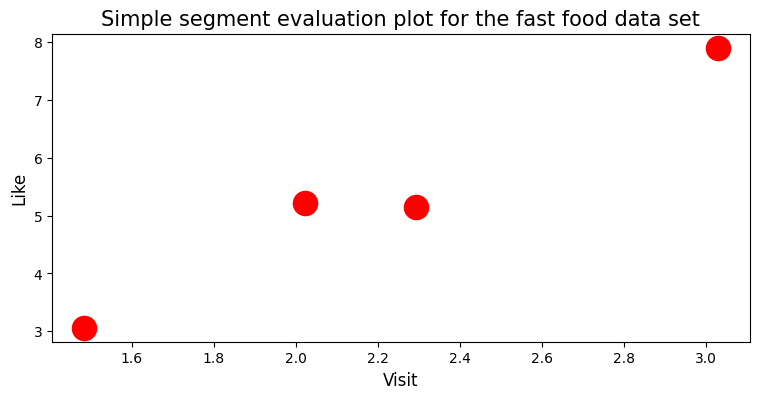

In [ ]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()